# Copy Number Pipeline

In [2]:
from __future__ import print_function
import os.path
import dalmatian as dm
import pandas as pd
from IPython.display import Image,display
from IPython.core.display import HTML 
import CCLE_postp_function as ccle
import sys
sys.path.insert(0, '../JKBio/')
import TerraFunction as terra
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
from taigapy import TaigaClient
tc = TaigaClient()

In [3]:
namespace="broad-genomics-delivery"
workspace="Getz_IBM_CellLines_Exomes"
refnamespace="broad-firecloud-ccle"
refworkspace="DepMap_WES_CN_HG38"
source="ibm"
sample_set_id = "19Q3interim"
release = sample_set_id

In [8]:
wm = dm.WorkspaceManager(namespace, workspace)
refwm = dm.WorkspaceManager(refnamespace, refworkspace)

In [79]:
newsample = CreateDatasetWithNewCellLines(wm,refwm)

Successfully imported 1 sample sets:
  * CCLE_19Q3interim (13 samples)


# ReaLign in HG38

In [46]:
bamtoubam= "BamToUnmappedRGBams_MC"
ubamtofilelist = "Generate_uBAM_File_List"
realign="Realign_WES_GATK4"

<dalmatian.wmanager.WorkspaceManager broad-firecloud-ccle/DepMap_WES_CN_HG38>

In [62]:
bamtoubam = refwm.get_config(bamtoubam)
bamtoubam

{'deleted': False,
 'inputs': {'BamToUnmappedRGBamsWf.input_bam': 'this.WES_bam',
  'BamToUnmappedRGBamsWf.preemptible_tries': '3',
  'BamToUnmappedRGBamsWf.ValidateSamFile.java_opt': '"-Xmx3000m"',
  'BamToUnmappedRGBamsWf.picard_docker': '"broadinstitute/genomes-in-the-cloud:2.3.1-1504795437"',
  'BamToUnmappedRGBamsWf.ref_fasta_index': 'workspace.ref_fasta_fai',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.disk_size': '400',
  'BamToUnmappedRGBamsWf.SortBamByQueryname.mem_size': '"3500 MB"',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.mem_size': '"3000 MB"',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.output_dir': '"."',
  'BamToUnmappedRGBamsWf.SortBamByQueryname.disk_size': '400',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.java_opt': '"-Xmx1200m"',
  'BamToUnmappedRGBamsWf.picard_path': '"/usr/gitc/"',
  'BamToUnmappedRGBamsWf.SortBamByQueryname.java_opt': '"-Xmx3000m"',
  'BamToUnmappedRGBamsWf.ref_fasta': 'workspace.ref_fasta',
  'BamToUnmappedRGBamsW

In [66]:
refwm.update_config(bamtoubam)
subid = refwm.create_submission(bamtoubam['name'],sample_set_id,"sample_set","this.samples")

Successfully updated configuration vdauwera/BamToUnmappedRGBams_MC
Successfully created submission dc4a91ca-571f-4966-8378-a6956bf6c01b.


In [ ]:
terra.wait_for_submission(subid)

In [71]:
ubamtofilelist = refwm.get_config(ubamtofilelist)
ubamtofilelist

{'deleted': False,
 'inputs': {'ArrayToTxt_workflow.CreateTxt.array_of_files': 'this.readgroup_ubams',
  'ArrayToTxt_workflow.CreateTxt.list_name': 'this.name'},
 'methodConfigVersion': 1,
 'methodRepoMethod': {'methodName': 'ArrayOfFilesToTxt',
  'methodVersion': 1,
  'methodNamespace': 'gkugener',
  'methodUri': 'agora://gkugener/ArrayOfFilesToTxt/1',
  'sourceRepo': 'agora'},
 'name': 'Generate_uBAM_File_List',
 'namespace': 'gkugener',
 'outputs': {'ArrayToTxt_workflow.CreateTxt.file_list_name': 'this.unmapped_bams_list'},
 'prerequisites': {},
 'rootEntityType': 'sample'}

In [73]:
refwm.update_config(ubamtofilelist)
subid = refwm.create_submission(ubamtofilelist['name'],sample_set_id,"sample_set","this.samples")

Successfully updated configuration gkugener/Generate_uBAM_File_List
Successfully created submission 6482067a-00c8-43b4-859c-a469917f4a56.


In [80]:
terra.wait_for_submission(refwm, subid)

TypeError: wait_for_submission() takes 1 positional argument but 2 were given

In [93]:
realign = refwm.get_config(realign)
realign

{'deleted': False,
 'inputs': {'PreProcessingForVariantDiscovery_GATK4.dbSNP_vcf': 'workspace.dbsnp_138',
  'PreProcessingForVariantDiscovery_GATK4.gatk_launch_path': '"/gatk/"',
  'PreProcessingForVariantDiscovery_GATK4.SamToFastqAndBwaMem.ref_amb': 'workspace.ref_bwa_amb',
  'PreProcessingForVariantDiscovery_GATK4.agg_preemptible_tries': '3',
  'PreProcessingForVariantDiscovery_GATK4.ref_fasta_index': 'workspace.ref_fasta_fai',
  'PreProcessingForVariantDiscovery_GATK4.GetBwaVersion.mem_size': '"1 GB"',
  'PreProcessingForVariantDiscovery_GATK4.unmapped_bam_suffix': '".bam"',
  'PreProcessingForVariantDiscovery_GATK4.ref_dict': 'workspace.ref_dict',
  'PreProcessingForVariantDiscovery_GATK4.SortAndFixTags.java_opt_sort': '"-Xms4000m"',
  'PreProcessingForVariantDiscovery_GATK4.gotc_docker': '"broadinstitute/genomes-in-the-cloud:2.3.0-1501082129"',
  'PreProcessingForVariantDiscovery_GATK4.picard_docker': '"broadinstitute/genomes-in-the-cloud:2.3.0-1501082129"',
  'PreProcessingForVar

In [94]:
refwm.update_config(realign)
subid = refwm.create_submission(realign['name'],sample_set_id,"sample_set","this.samples")

Successfully updated configuration gatk/Realign_WES_GATK4
Successfully created submission 5d172f35-8df7-4bba-acc8-c54efaf4e563.


In [ ]:
terra.wait_for_submission(refwm, subid)

In [5]:
CNV_woXY = refwm.get_config("CNV_sample_XX")
CNV_woXY

{'deleted': False,
 'inputs': {'CNVSomaticPairWorkflow.preemptible_attempts': '5',
  'CNVSomaticPairWorkflow.oncotator_docker': '',
  'CNVSomaticPairWorkflow.mem_gb_for_call_copy_ratio_segments': '',
  'CNVSomaticPairWorkflow.num_smoothing_iterations_per_fit': '',
  'CNVSomaticPairWorkflow.ModelSegmentsNormal.output_dir': '',
  'CNVSomaticPairWorkflow.PlotModeledSegmentsTumor.output_dir': '',
  'CNVSomaticPairWorkflow.calling_copy_ratio_z_score_threshold': '',
  'CNVSomaticPairWorkflow.minor_allele_fraction_prior_alpha': '',
  'CNVSomaticPairWorkflow.ModelSegmentsTumor.output_dir': '',
  'CNVSomaticPairWorkflow.gatk_docker': 'workspace.gatk_docker',
  'CNVSomaticPairWorkflow.num_changepoints_penalty_factor': '',
  'CNVSomaticPairWorkflow.common_sites': 'workspace.common_sites_hg38',
  'CNVSomaticPairWorkflow.tumor_bam_idx': 'this.WES_bai',
  'CNVSomaticPairWorkflow.PlotModeledSegmentsNormal.cpu': '',
  'CNVSomaticPairWorkflow.mem_gb_for_oncotator': '',
  'CNVSomaticPairWorkflow.neutral

In [7]:
CNV_woXY['inputs']['CNVSomaticPairWorkflow.tumor_bam_idx'] = "this.hg38_analysis_ready_bam_index"
CNV_woXY['inputs']['CNVSomaticPairWorkflow.tumor_bam'] = "this.hg38_analysis_ready_bam"
CNV_woXY['inputs']['CNVSomaticPairWorkflow.read_count_pon'] = "workspace.ice_pon_xx"
CNV_woXY['inputs']['CNVSomaticPairWorkflow.intervals'] ="workspace.ice_xx_intervals_no_pad"
refwm.update_config(CNV_woXY)
submission_id = refwm.create_submission(CNV_woXY['name'],etype='sample_set',entity=sample_set_id,expression='this.samples')


Successfully updated configuration gatk/CNV_sample_XX
Successfully created submission a47451e6-abb6-45b9-98ab-ee21f9794b98.


In [ ]:
terra.wait_for_submission(refwm,submission_id)

In [6]:
aggregate = refwm.get_config("Aggregate_CN_seg_files")
aggregate

{'deleted': False,
 'inputs': {'aggregate_CN_segments_wrkflw.aggregate_CN_segments.disk_space': '10',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.num_preempt': '5',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.aggregate_seg_files_script': 'workspace.cn_single_file_script',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.memory': '5',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.sample_set_id': 'this.name',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.sample_seg_files': 'this.samples.called_copy_ratio_segments_tumor'},
 'methodConfigVersion': 4,
 'methodRepoMethod': {'methodName': 'Aggregate_CN_seg_files',
  'methodVersion': 2,
  'methodNamespace': 'gkugener',
  'methodUri': 'agora://gkugener/Aggregate_CN_seg_files/2',
  'sourceRepo': 'agora'},
 'name': 'Aggregate_CN_seg_files',
 'namespace': 'gkugener',
 'outputs': {'aggregate_CN_segments_wrkflw.aggregate_CN_segments.combined_cn_file': 'this.combined_seg_file'},
 'prerequisites': {},
 'rootEnt

In [8]:
submission_id = refwm.create_submission(aggregate['name'],entity=sample_set_id)


Successfully created submission f2e27f7a-2a07-4726-b891-635e94e629a0.


In [9]:
terra.wait_for_submission(refwm,submission_id)

KeyboardInterrupt: 

In [19]:
aggregated = refwm.get_entities('sample_set').loc[sample_set_id]["combined_seg_file"]
aggregated

'gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d268324/f2e27f7a-2a07-4726-b891-635e94e629a0/aggregate_CN_segments_wrkflw/fa3fa788-89ce-4b9a-9f47-47b56c1796c4/call-aggregate_CN_segments/CCLE_19Q3interim.called.seg'

In [20]:
! gsutil cp $aggregated "temp/cnv_ccle.called.seg"

Copying gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d268324/f2e27f7a-2a07-4726-b891-635e94e629a0/aggregate_CN_segments_wrkflw/fa3fa788-89ce-4b9a-9f47-47b56c1796c4/call-aggregate_CN_segments/CCLE_19Q3interim.called.seg...
/ [1 files][122.4 KiB/122.4 KiB]                                                
Operation completed over 1 objects/122.4 KiB.                                    


In [12]:
%%R
source('../JKBio/gkugener/RScripts/load_libraries_and_annotations.R')
source("CCLE_postp_function.R")
genome_version <- 'hg38'
release <- '19Q3interim'
hg38_cyto_band_reference <- 'data/hg38_cytoband.gz'
new_samples_copy_number_broad_wes <- 'temp/cnv_ccle.called.seg'

Fetching https://cds.team/taiga/api/dataset/msigdb-gene-set-collections-8453/2 
Status 200 


2019-06-19 03:40:01::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



loading cached data version from  ~/.taiga/msigdb-gene-set-collections-8453_2.toc 
Checking for cached file ~/.taiga/495ea37b8d744a428946a5628c5fe7ce_gsc-data.raw 


In [6]:
%%R
# Previous release copy number profiles. This line will need to be updated as well
wes.priority.cn.seg.profiles <- taigr::load.from.taiga(data.name='segmented-cn-wes-prioritzed-7fe1', data.file='CCLE_internal_19q2_segmented_cn') %>%
  dplyr::select(DepMap_ID, Chromosome, Start, End, Num_Probes, Segment_Mean, Source)
wes.priority.cn.gene.profiles <- taigr::load.from.taiga(data.name='segmented-cn-wes-prioritzed-7fe1', data.file='CCLE_internal_19q2_gene_cn')

Fetching https://cds.team/taiga/api/datafile?format=metadata&dataset_permaname=segmented-cn-wes-prioritzed-7fe1&datafile_name=CCLE_internal_19q2_segmented_cn 
Status 200 


R[write to console]: No encoding supplied: defaulting to UTF-8.



Could not find segmented-cn-wes-prioritzed-7fe1 in cache, requesting from taiga...
Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=fc139d4490ea48c98c7bb29ead4d2a1d&datafile_name=CCLE_internal_19q2_segmented_cn 
Status 200 


R[write to console]: No encoding supplied: defaulting to UTF-8.

R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v25/CCLE_internal_19q2_segmented_cn ...



  |======================================================================| 100%
Saving segmented-cn-wes-prioritzed-7fe1 in cache ( fc139d4490ea48c98c7bb29ead4d2a1d CCLE_internal_19q2_segmented_cn )...


R[write to console]: Saved to cache as fc139d4490ea48c98c7bb29ead4d2a1d_ccle-internal-19q2-segmented-cn.rds



writing /home/jeremie/.taiga/fc139d4490ea48c98c7bb29ead4d2a1d_ccle-internal-19q2-segmented-cn.idx /home/jeremie/.taiga/segmented-cn-wes-prioritzed-7fe1_ccle-internal-19q2-segmented-cn_25.idx 
Fetching https://cds.team/taiga/api/datafile?format=metadata&dataset_permaname=segmented-cn-wes-prioritzed-7fe1&datafile_name=CCLE_internal_19q2_gene_cn 
Status 200 


R[write to console]: No encoding supplied: defaulting to UTF-8.

R[write to console]: Loading from cached file /home/jeremie/.taiga/fc139d4490ea48c98c7bb29ead4d2a1d_ccle-internal-19q2-gene-cn.rds



In [41]:
%%R
segments <- filter_for_CCLE(process_segments(new_samples_copy_number_broad_wes))
segments <- interpolate_gaps_in_segmented(segments)$segs
segments %<>% extend_ends_of_segments(.,'../JKBio/data/hg38_cytoband.gz')
print(segments)
print(head(wes.priority.cn.seg.profiles))
segments <- reprioritize_data(segments, wes.priority.cn.seg.profiles)
# Fill in the gaps on the entire dataset
# Extend start sites to 1, end sites to the end of the chromosome?

# TODO: IF seqnames (CHR) are 1-9 values, append "chr" in front of each! (bulk)
# ifelse(grepl("[0-9]+", new_copy_number$ChrChromosome), "chr"+, "no")


[1] 0


R[write to console]: Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character()
)



# A tibble: 2,326 x 7
   DepMap_ID  seqnames     start       end Num_Probes Segment_Mean Source   
   <chr>      <fct>        <dbl>     <dbl>      <dbl>        <dbl> <chr>    
 1 ACH-001518 chr1             1  16457368       2069  1.05        Broad WES
 2 ACH-001518 chr1      16457369  16976116         61  1.48        Broad WES
 3 ACH-001518 chr1      16976117 101023537       7024  1.02        Broad WES
 4 ACH-001518 chr1     101023538 149487698       1672  1.19        Broad WES
 5 ACH-001518 chr1     149487699 149636094          1  0.0767      Broad WES
 6 ACH-001518 chr1     149636095 248956422       8383  1.02        Broad WES
 7 ACH-001518 chr2             1  47624291       2999  1.00        Broad WES
 8 ACH-001518 chr2      47624292  47787210          2  0.000000991 Broad WES
 9 ACH-001518 chr2      47787211  86852415       2131  0.991       Broad WES
10 ACH-001518 chr2      86852416  87262876          3  0.0346      Broad WES
# … with 2,316 more rows
   DepMap_ID Chromosome    St

In [14]:
%%R
read_csv(paste0("temp/wes.",release,".segmented.cn"))

2019-06-19 03:40:29::WARNING  R[write to console]: Parsed with column specification:
cols(
  DepMap_ID = col_character(),
  Chromosome = col_character(),
  Start = col_double(),
  End = col_double(),
  Num_Probes = col_double(),
  Segment_Mean = col_double(),
  Source = col_character()
)



# A tibble: 326,387 x 7
   DepMap_ID  Chromosome    Start      End Num_Probes Segment_Mean Source    
   <chr>      <chr>         <dbl>    <dbl>      <dbl>        <dbl> <chr>     
 1 ACH-000001 1                 1  1969745        286        2.55  Sanger WES
 2 ACH-000001 1           1969746  6354345        365        2.18  Sanger WES
 3 ACH-000001 1           6354346  6958256        100        3.11  Sanger WES
 4 ACH-000001 1           6958257 15977206        884        2.13  Sanger WES
 5 ACH-000001 1          15977207 16174774         57        2.95  Sanger WES
 6 ACH-000001 1          16174775 16275770         19        1.71  Sanger WES
 7 ACH-000001 1          16275771 19181515        296        0.953 Sanger WES
 8 ACH-000001 1          19181516 20085476        120        1.31  Sanger WES
 9 ACH-000001 1          20085477 34488045       1590        1.01  Sanger WES
10 ACH-000001 1          34488046 35149857         39        2.01  Sanger WES
# … with 326,377 more rows


In [52]:
%%R

segments <- dplyr::rename(segments, seqnames=Chromosomes, start=Start, end=End)
write.table(segments, file = paste0("temp/wes.",release,".segmented.cn"), sep = ',', quote = F, row.names = F) 
# What we upload to taiga
# TODO : change column name again

In [19]:
%%R
entrezgenes <- generate_entrez_genes()

In [42]:
%%R
genematrix <- generate_gene_level_matrix_from_segments(entrezgenes, segments)

In [51]:
%%R
corner(genematrix)

           A1BG (1) NAT2 (10) ADA (100) CDH2 (1000) AKT3 (10000)
ACH-000001 1.265172 1.1415254 1.2958359   0.6627515     1.012791
ACH-000002 1.013633 0.9741737 1.0175121   1.4893275     1.012618
ACH-000003 1.031898 1.0958118 1.8768326   0.5364814     1.002498
ACH-000004 1.349290 1.0865089 0.7855092   1.0770610     1.086057
ACH-000005 1.222033 1.1622070 0.7612536   1.0724579     1.120937


In [53]:
%%R
write.table(genematrix, file = paste0('temp/wes.',release,'.gene.cn'), 
      sep = ',', quote = F, row.names = T)

## Validation step

In [27]:
genecn = pd.read_csv('temp/wes.'+release+'.gene.cn', sep = '\t')
segmentcn = pd.read_csv('temp/cnv_ccle.called.seg', sep = '\t')

In [ ]:
prev = set(tc.get(name='segmented-cn-wes-prioritzed-7fe1', version=27, file='wes.19Q3interim.gene').columns().values.tolist())
new1 = set(genecn.columns().values.tolist())
new2 = set(segmentcn['DepMap_ID'].values.tolist())
print(len(prev), len(prev & new1), len(new1), len(new1 & new2))

In [28]:
ccle.checkAmountOfSegments(segmentcn,thresh = 850)

In [26]:
ccle.checkGeneChangeAccrossAll(genecn, thresh=1.5)

array([], dtype=object)

In [38]:
newsamples =  list(set(segmentcn["Sample"].tolist()))

In [30]:
segmentcn

Sample CONTIG      START        END  NUM_POINTS_COPY_RATIO  \
0     ibm_ACH-001518   chr1     785776   16456145                   2069   
1     ibm_ACH-001518   chr1   16458591   16975982                     61   
2     ibm_ACH-001518   chr1   16976250  101022017                   7024   
3     ibm_ACH-001518   chr1  101025058  149487635                   1672   
4     ibm_ACH-001518   chr1  149487762  149488437                      1   
5     ibm_ACH-001518   chr1  149783752  248918615                   8383   
6     ibm_ACH-001518   chr2      41357   47570583                   2999   
7     ibm_ACH-001518   chr2   47678000   47783745                      2   
8     ibm_ACH-001518   chr2   47790676   86847025                   2131   
9     ibm_ACH-001518   chr2   86857806   87187492                      3   
10    ibm_ACH-001518   chr2   87338261   88861558                     64   
11    ibm_ACH-001518   chr2   88861725   90234982                     54   
12    ibm_ACH-001518   chr2   91940935  178554334                   4570   
13    ibm_ACH-001518   chr2  178554335  178680581                    152   
14    ibm_ACH-001518   chr2  178680829  178834690                    139   
15    ibm_ACH-001518   chr2  178836615  219515558                   2806   
16    ibm_ACH-001518   chr2  219531507  221430403                     89   
17    ibm_ACH-001518   chr2  221433891  242004734                   1751   
18    ibm_ACH-001518   chr3     197398  198170102                  11743   
19    ibm_ACH-001518   chr4      85481  165182806                   6880   
20    ibm_ACH-001518   chr4  165207626  190082636                    818   
21    ibm_ACH-001518   chr5     140057   36976654                   1244   
22    ibm_ACH-001518   chr5   36984425   37065144                     38   
23    ibm_ACH-001518   chr5   37107351  172968851                   6503   
24    ibm_ACH-001518   chr5  172969162  175926991                     72   
25    ibm_ACH-001518   chr5  175967691  181261065                    753   
26    ibm_ACH-001518   chr6     203183   32005939                   2092   
27    ibm_ACH-001518   chr6   32005940   32098456                     67   
28    ibm_ACH-001518   chr6   32115488  170583999                   7631   
29    ibm_ACH-001518   chr7     192950  142066081                   7902   
...              ...    ...        ...        ...                    ...   
2296  ibm_ACH-002069  chr19   50876221   51627790                    167   
2297  ibm_ACH-002069  chr19   51643104   51645656                      4   
2298  ibm_ACH-002069  chr19   51692734   54219697                    358   
2299  ibm_ACH-002069  chr19   54220373   54239341                      9   
2300  ibm_ACH-002069  chr19   54239446   54455767                     76   
2301  ibm_ACH-002069  chr19   54455768   54822110                    106   
2302  ibm_ACH-002069  chr19   54824777   55181960                    143   
2303  ibm_ACH-002069  chr19   55181961   58572882                    565   
2304  ibm_ACH-002069  chr20      87459   64273852                   4677   
2305  ibm_ACH-002069  chr21    9068165   10542698                      9   
2306  ibm_ACH-002069  chr21   10543076   14643383                     65   
2307  ibm_ACH-002069  chr21   14658498   25706340                    123   
2308  ibm_ACH-002069  chr21   25709183   25709701                      1   
2309  ibm_ACH-002069  chr21   25711971   29065357                    126   
2310  ibm_ACH-002069  chr21   29066465   43797591                   1106   
2311  ibm_ACH-002069  chr21   43797592   46664624                    521   
2312  ibm_ACH-002069  chr22   15698411   22646638                    723   
2313  ibm_ACH-002069  chr22   22646639   22901545                     33   
2314  ibm_ACH-002069  chr22   22906092   38962354                   1814   
2315  ibm_ACH-002069  chr22   38964362   38992738                      8   
2316  ibm_ACH-002069  chr22   39014112   42128567             

In [55]:
samples = refwm.get_samples()
plots = samples.loc[samples.index.isin(newsamples)]["modeled_segments_plot_tumor"].values
for plot in plots:
    ! gsutil cp $plot temp/

Copying gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d268324/a47451e6-abb6-45b9-98ab-ee21f9794b98/CNVSomaticPairWorkflow/d1b9ac7b-eddc-4b03-8e72-9c813fb24df5/call-PlotModeledSegmentsTumor/out/ibm_ACH-001518.hg38.modeled.png...
/ [1 files][472.8 KiB/472.8 KiB]                                                
Operation completed over 1 objects/472.8 KiB.                                    
Copying gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d268324/a47451e6-abb6-45b9-98ab-ee21f9794b98/CNVSomaticPairWorkflow/47352de6-4dec-441f-8eb5-fe4bc962fac1/call-PlotModeledSegmentsTumor/out/ibm_ACH-001616.hg38.modeled.png...
/ [1 files][532.0 KiB/532.0 KiB]                                                
Operation completed over 1 objects/532.0 KiB.                                    
Copying gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d268324/a47451e6-abb6-45b9-98ab-ee21f9794b98/CNVSomaticPairWorkflow/a67edc86-e0f5-4f9f-80ce-ae99b0d315eb/call-PlotModeledSegmentsTumor/out/ibm_ACH-001623.hg38.modeled.png

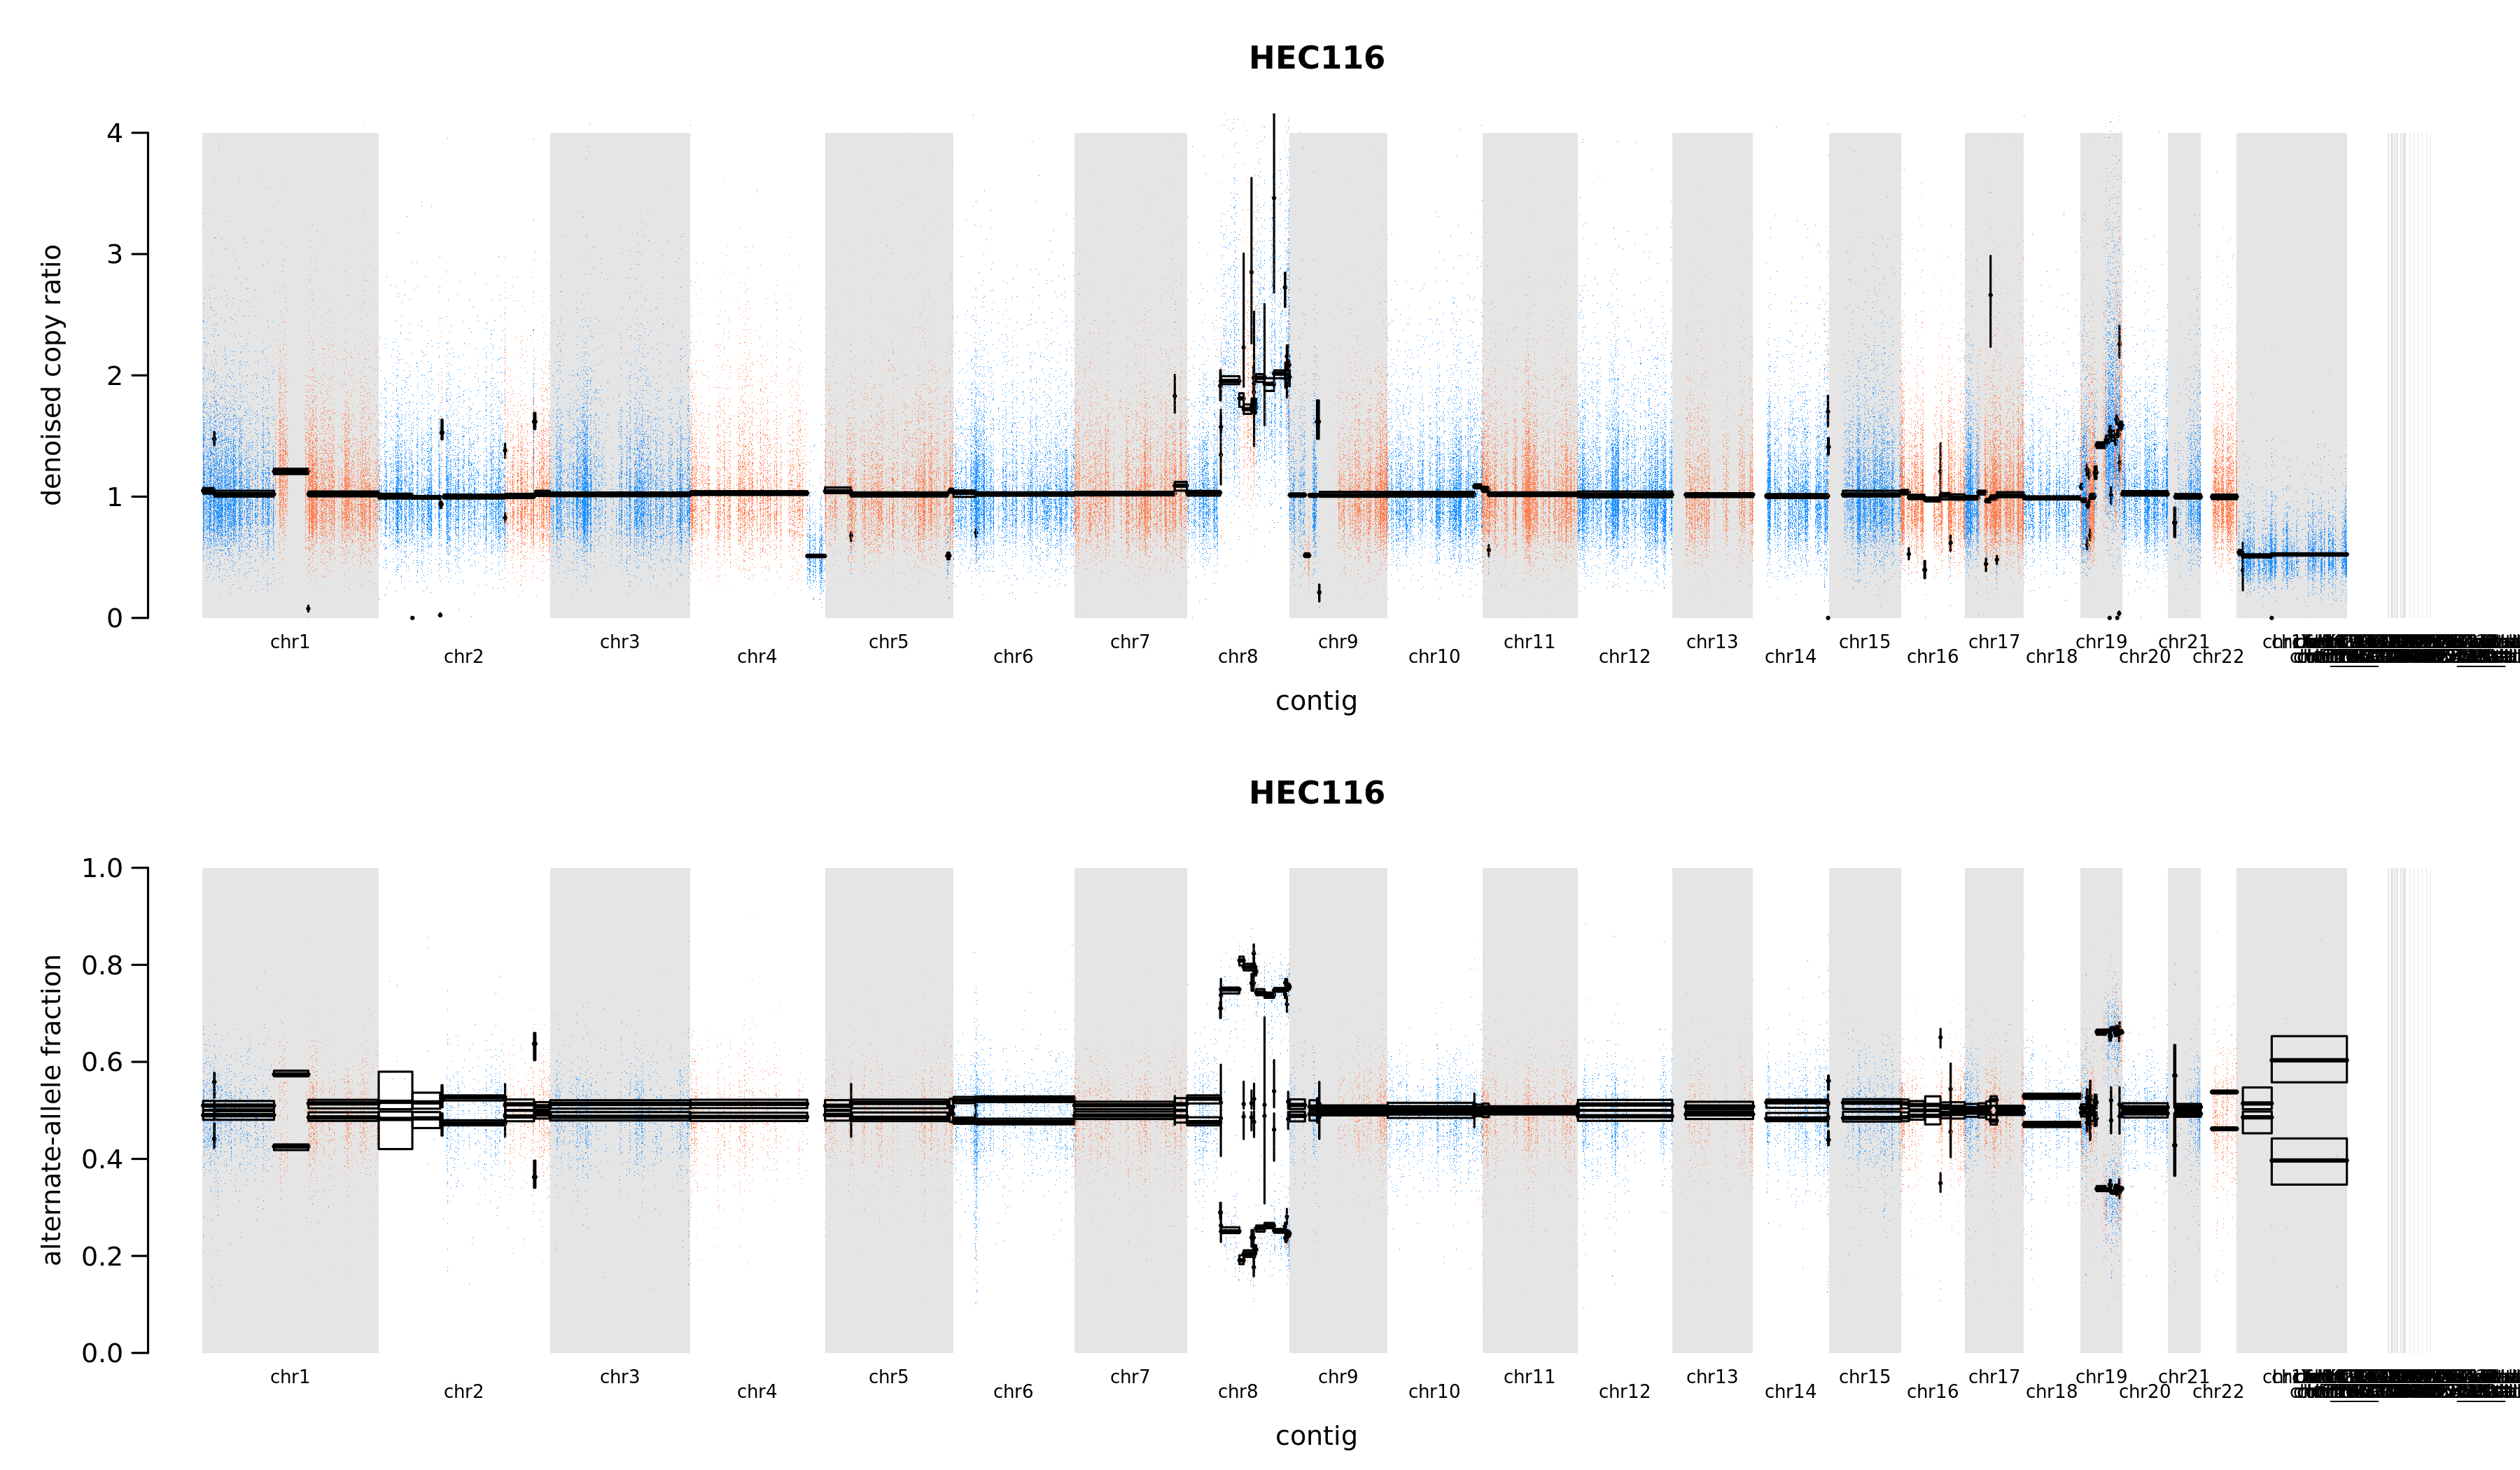

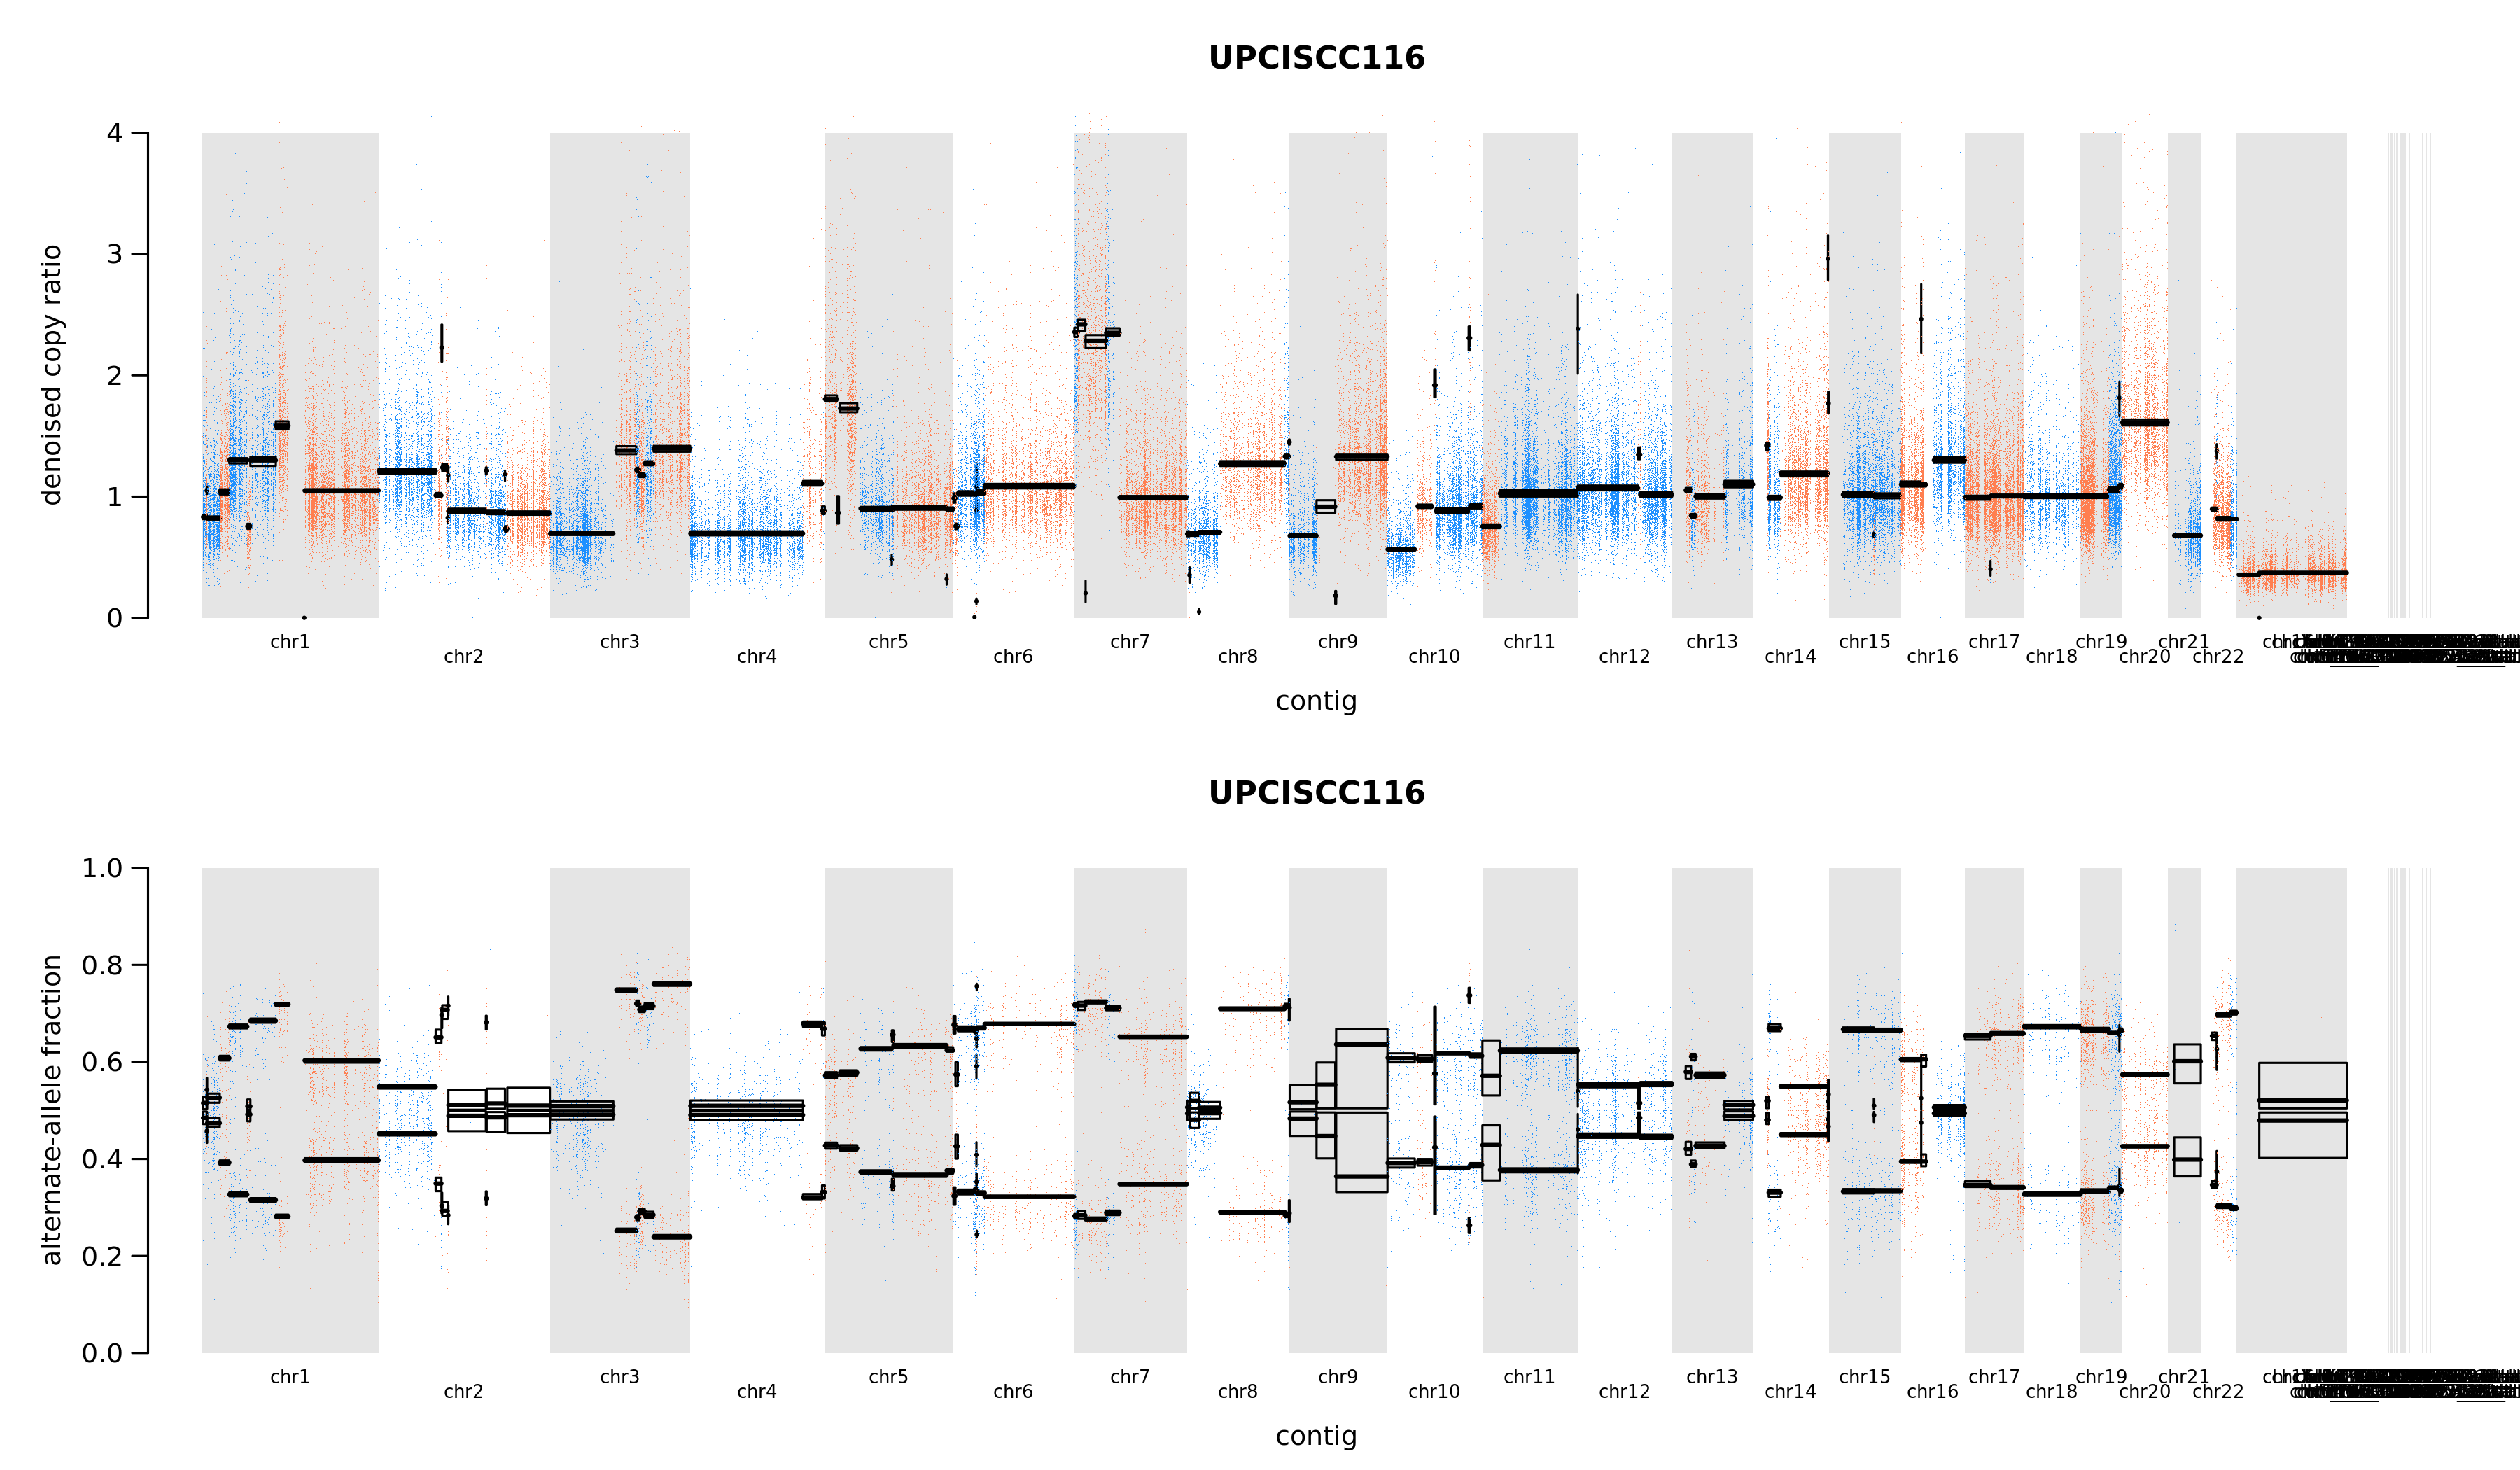

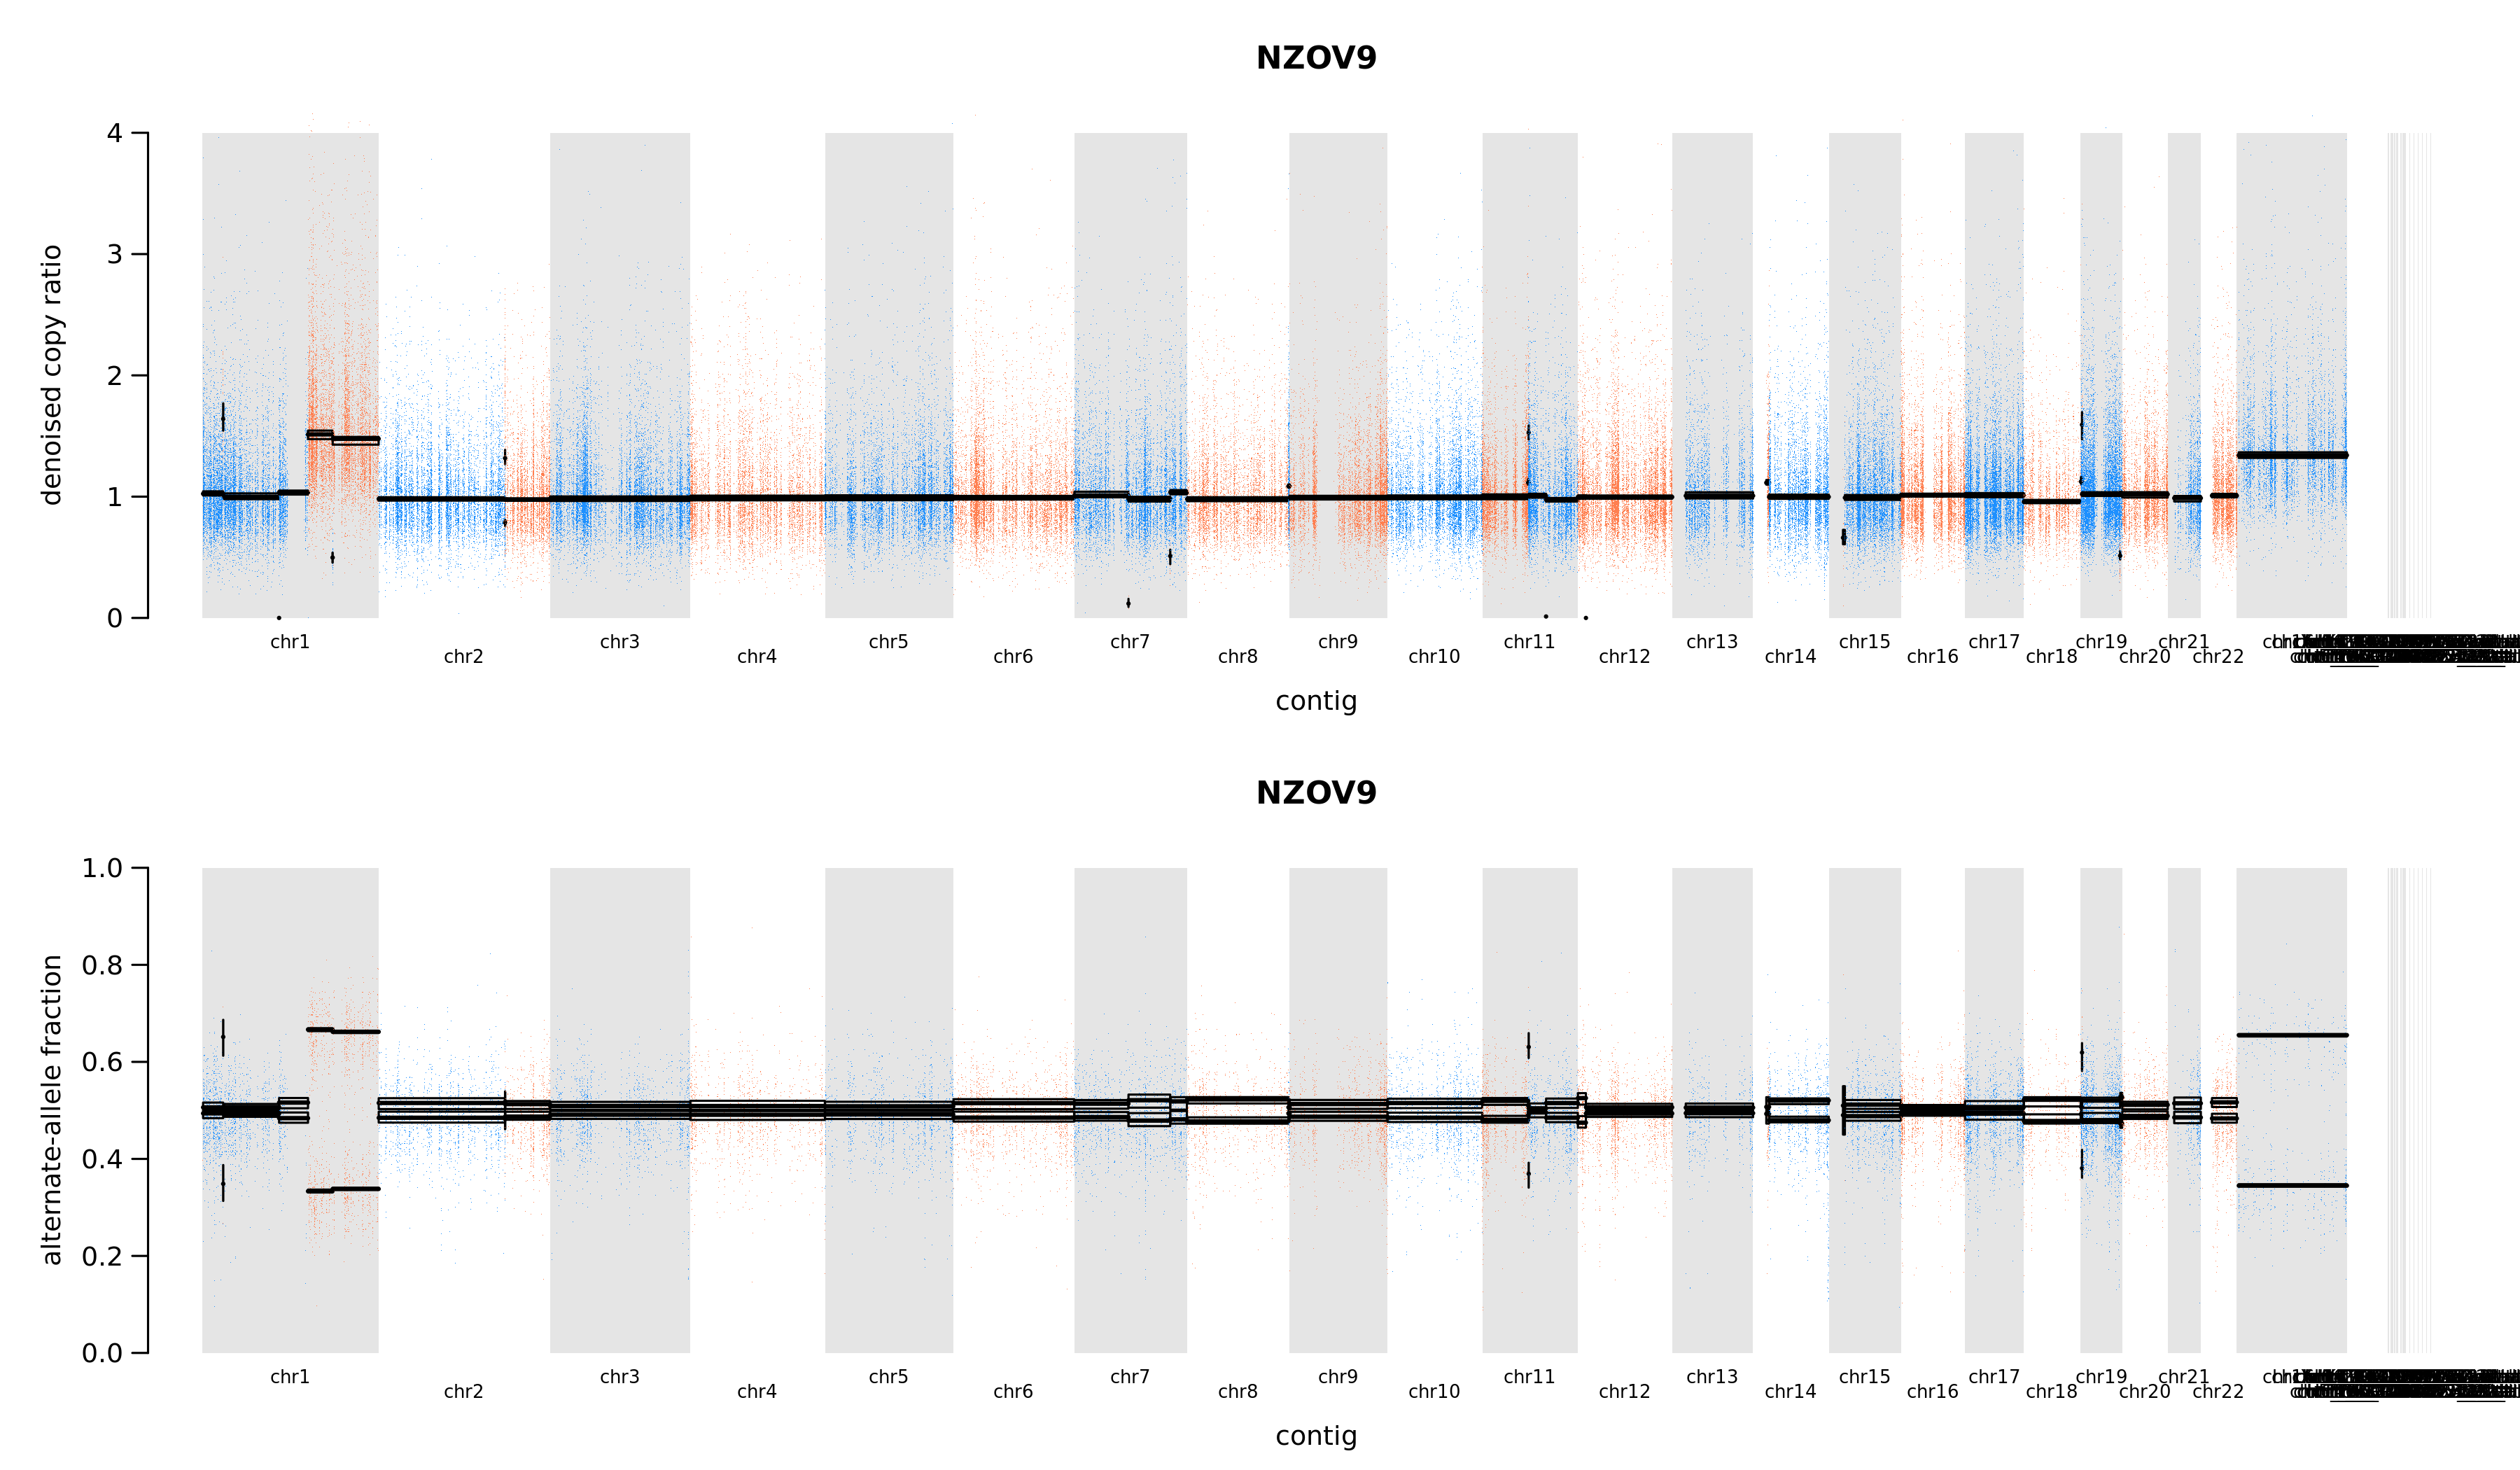

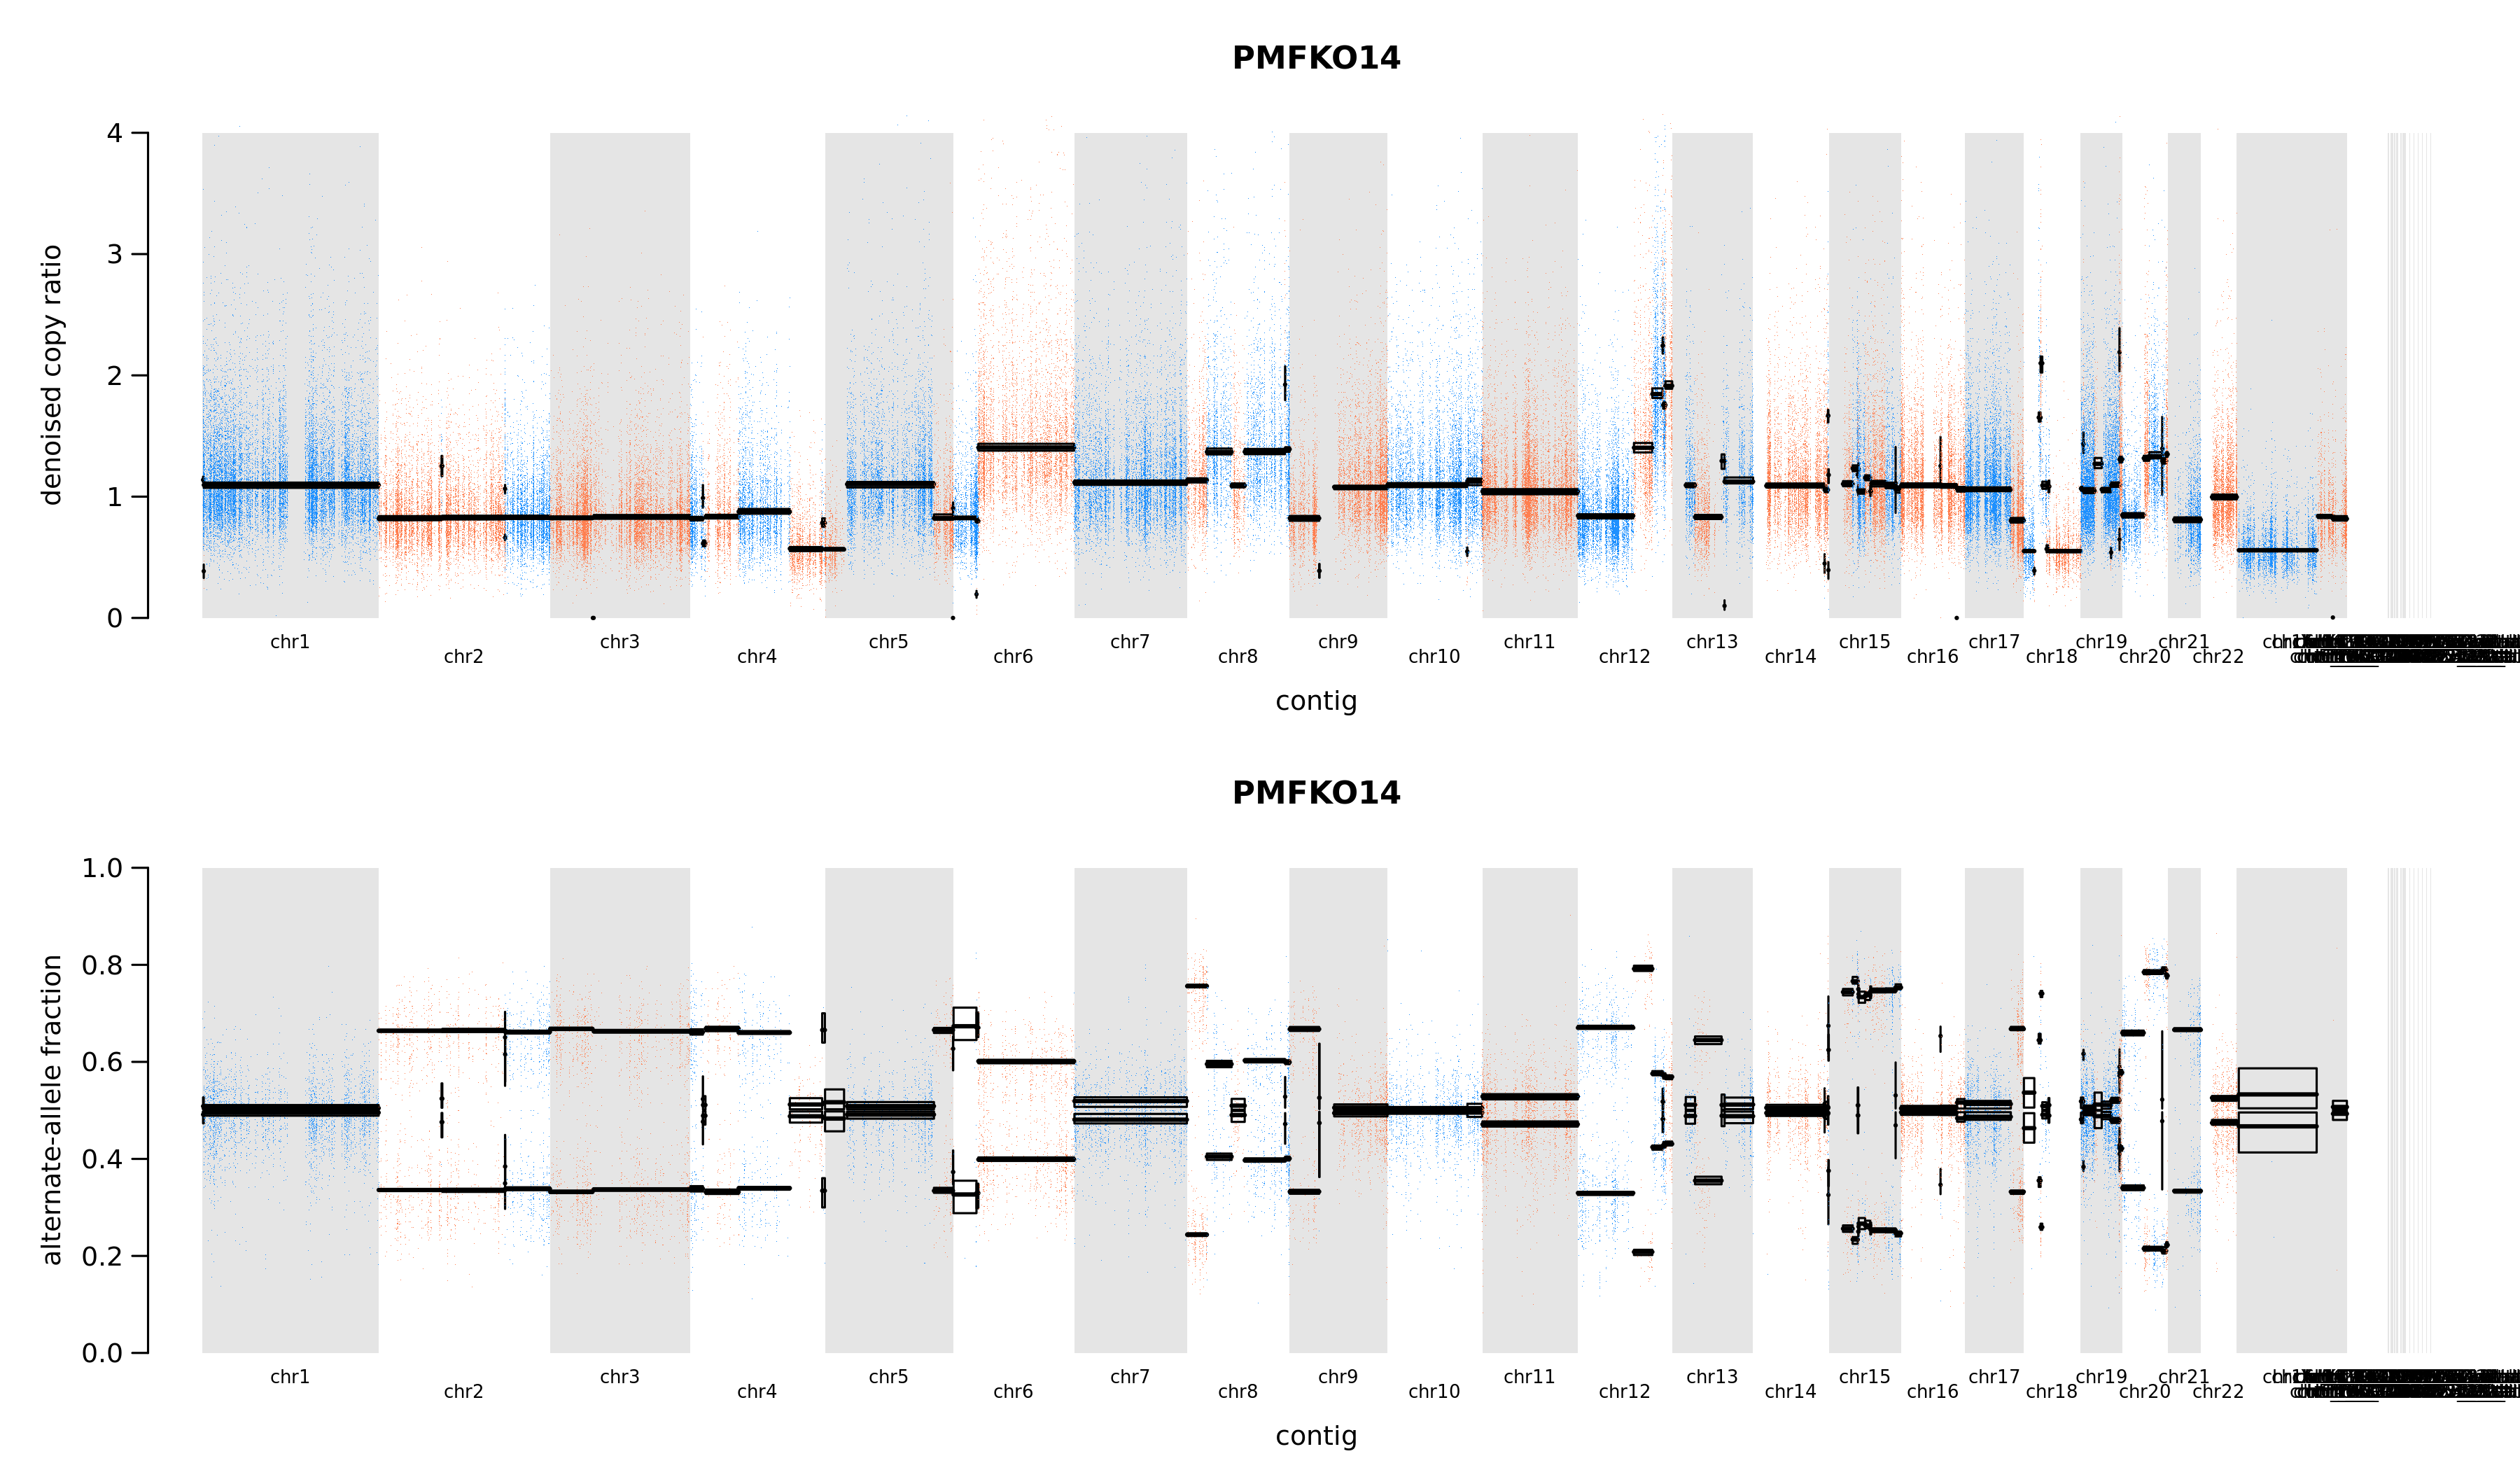

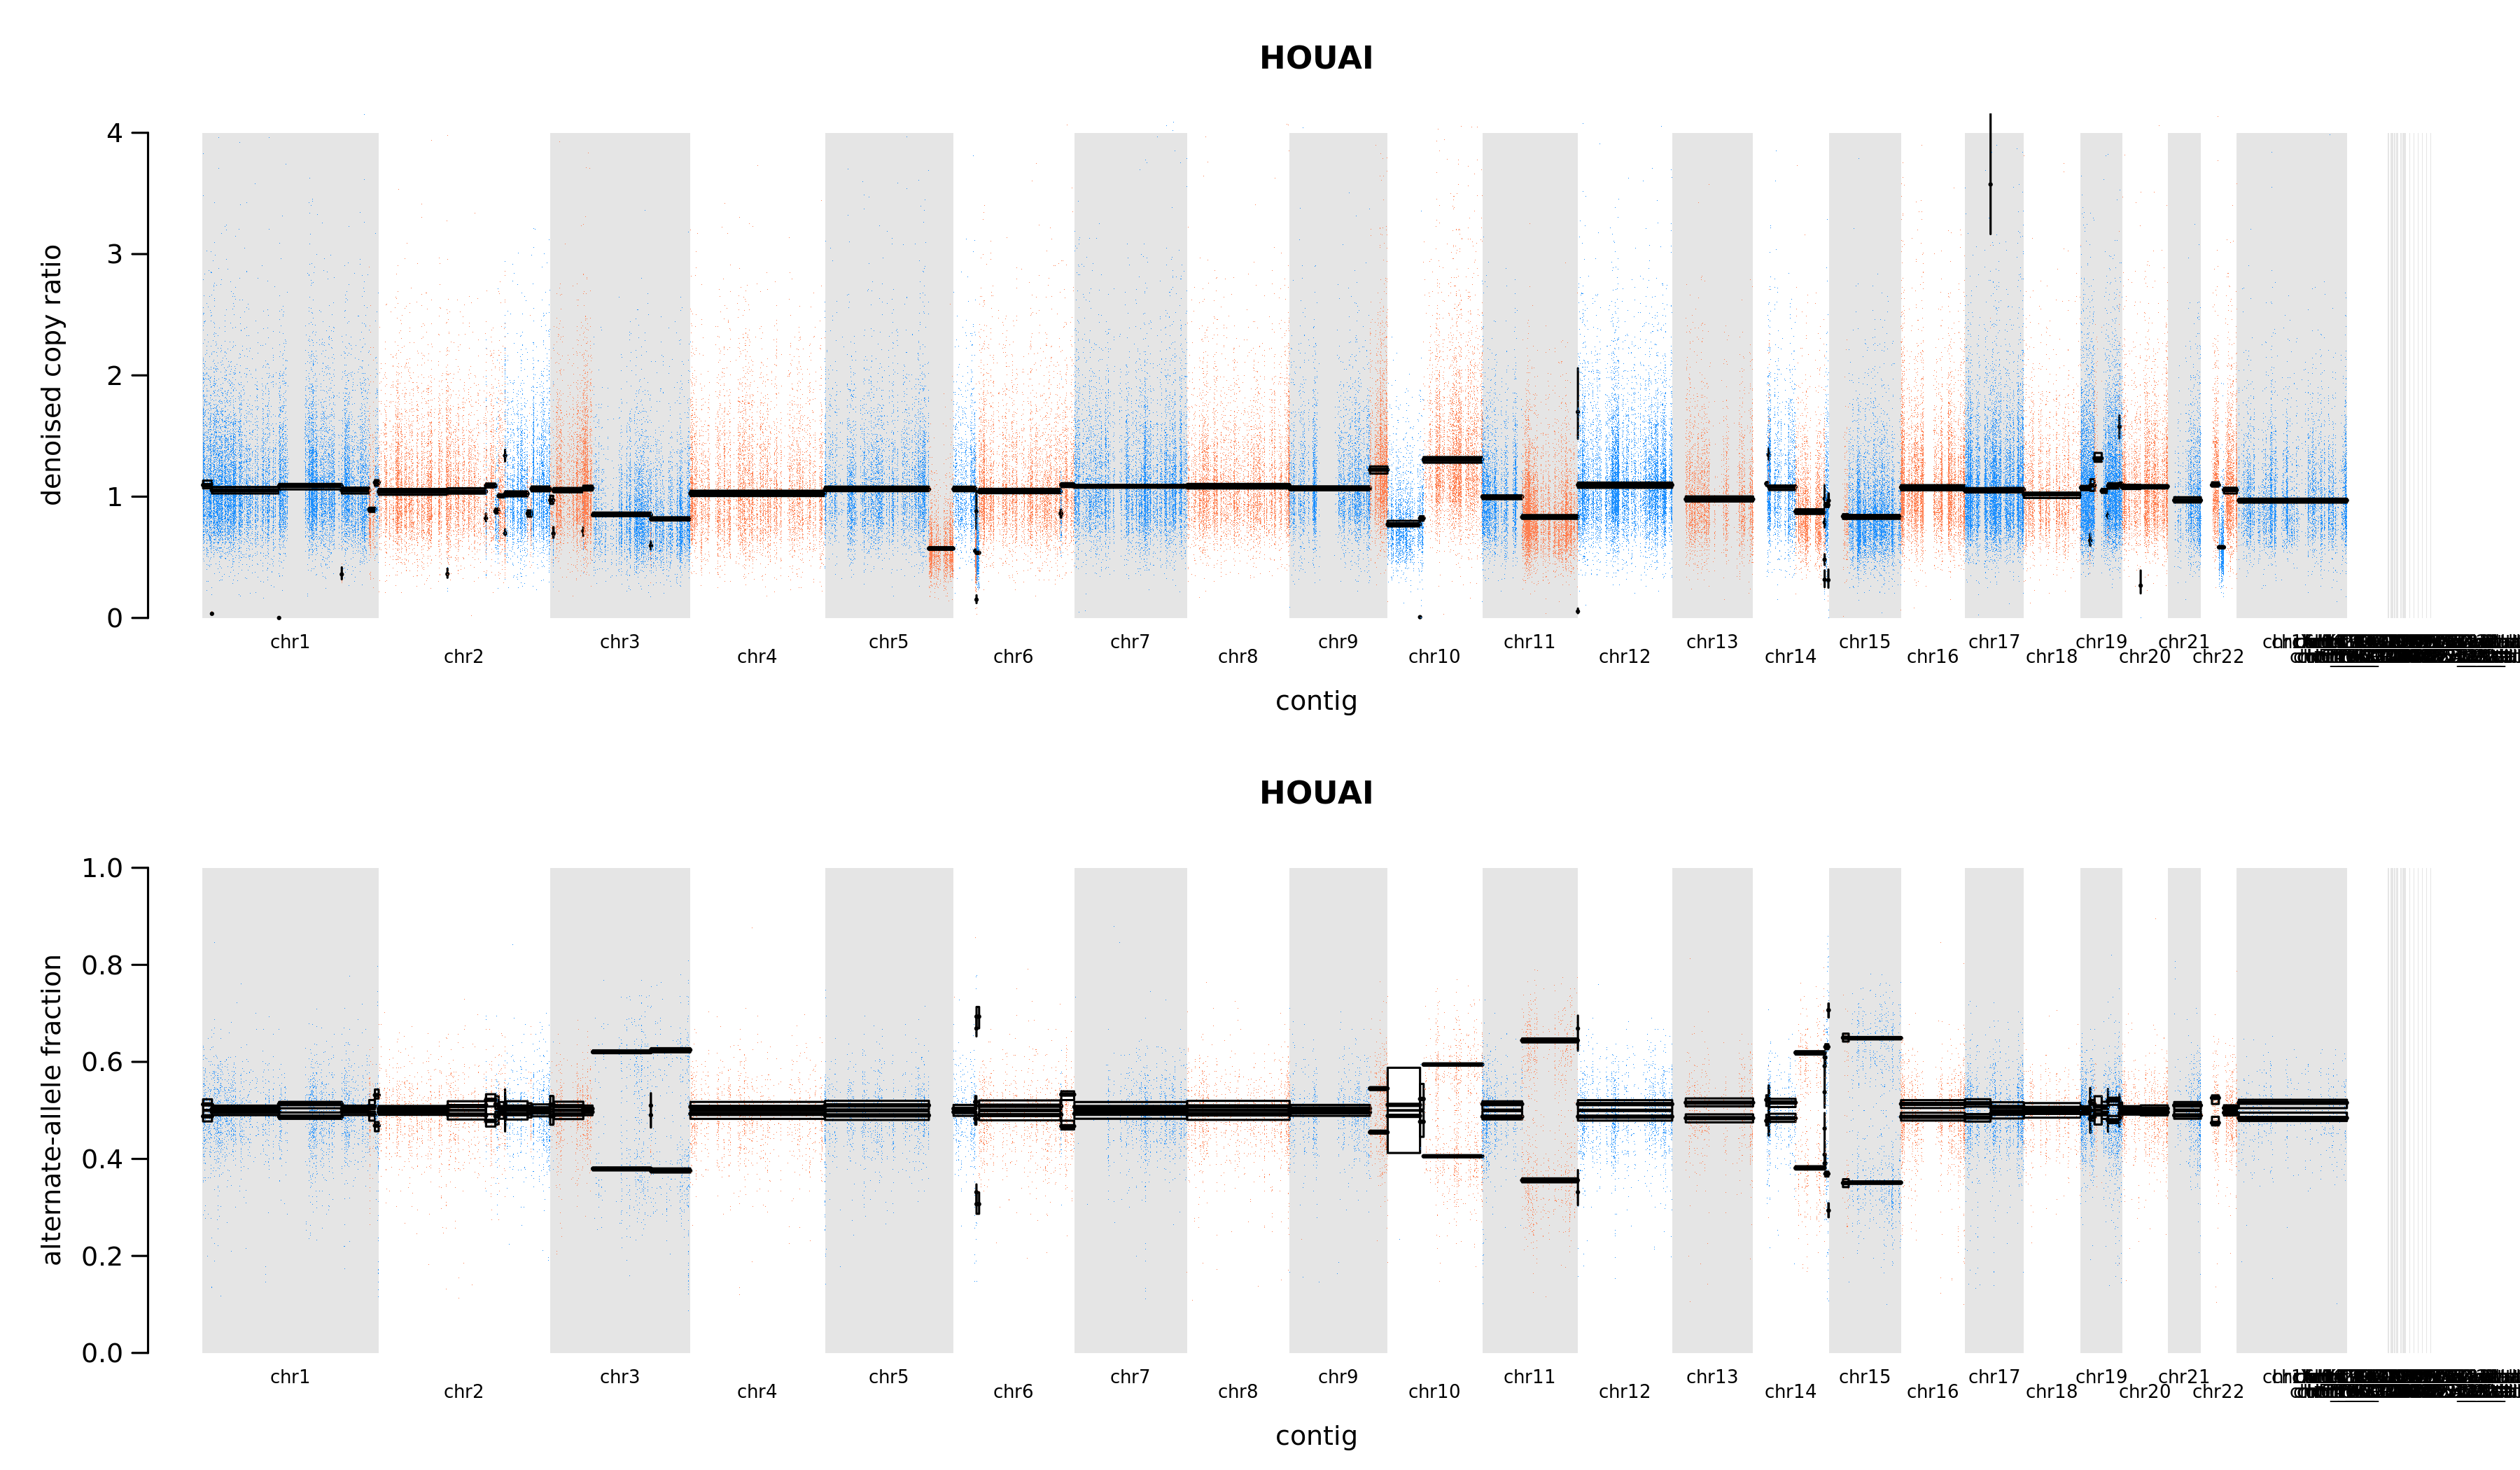

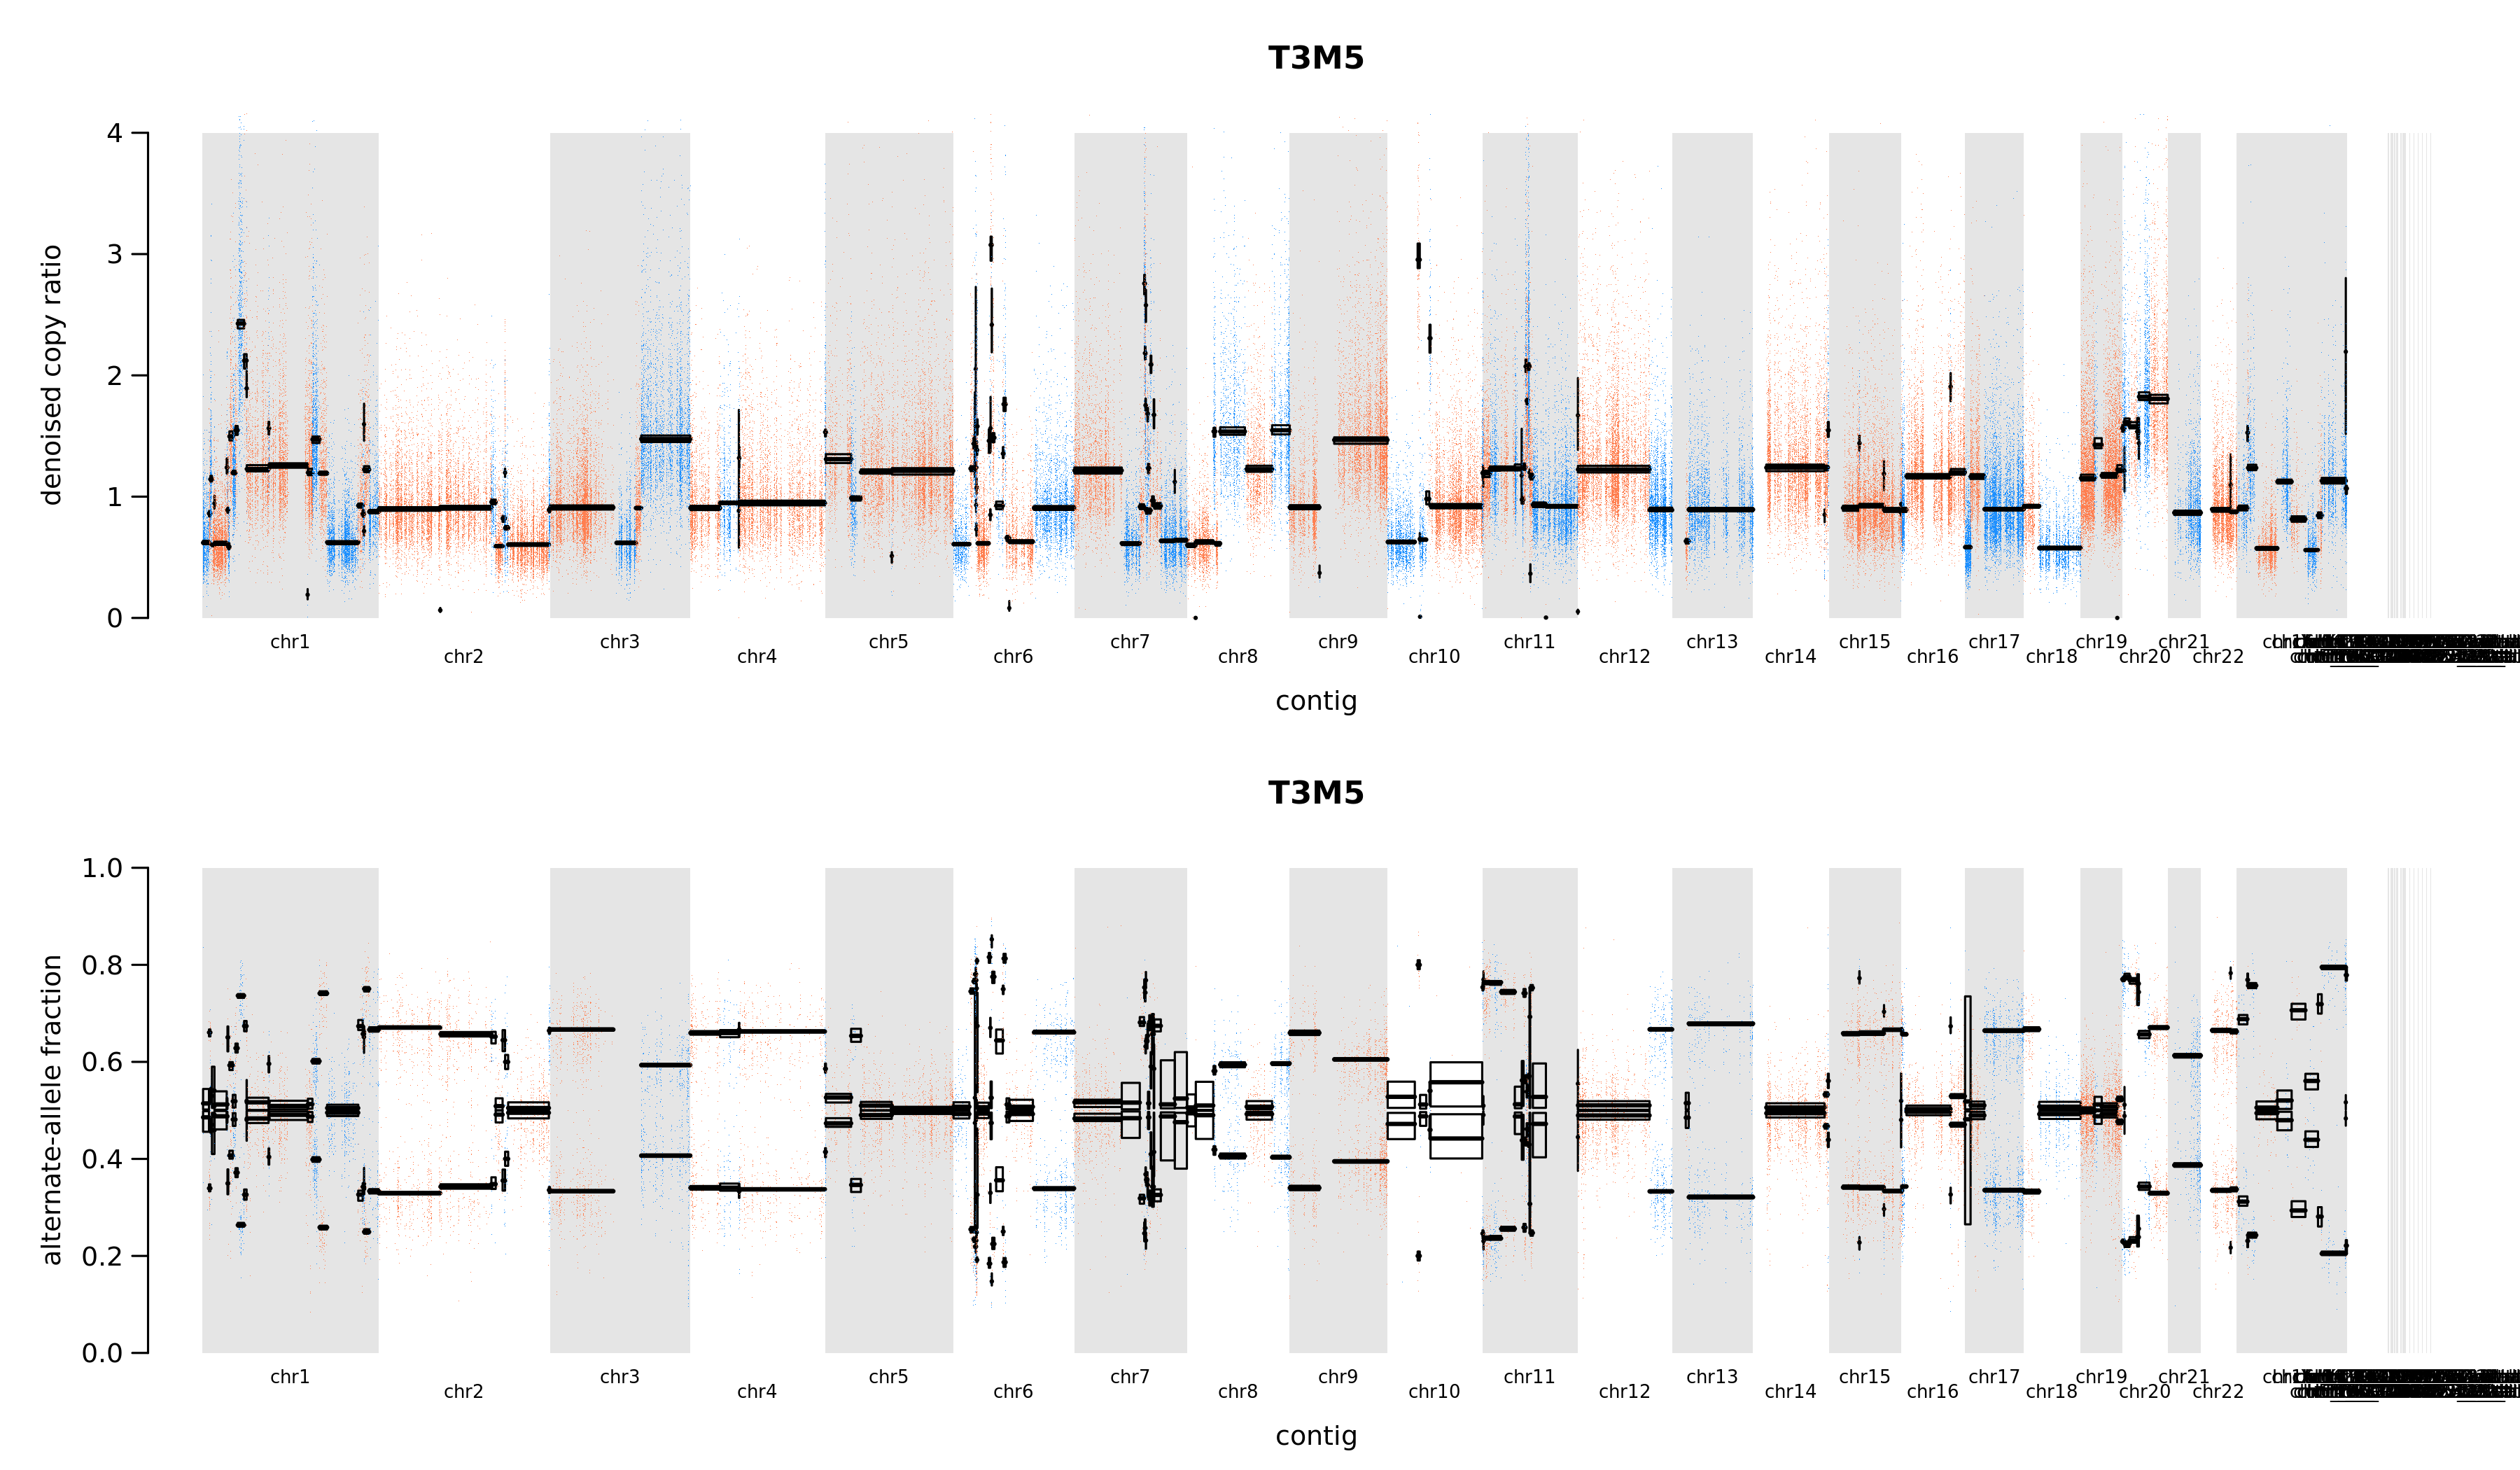

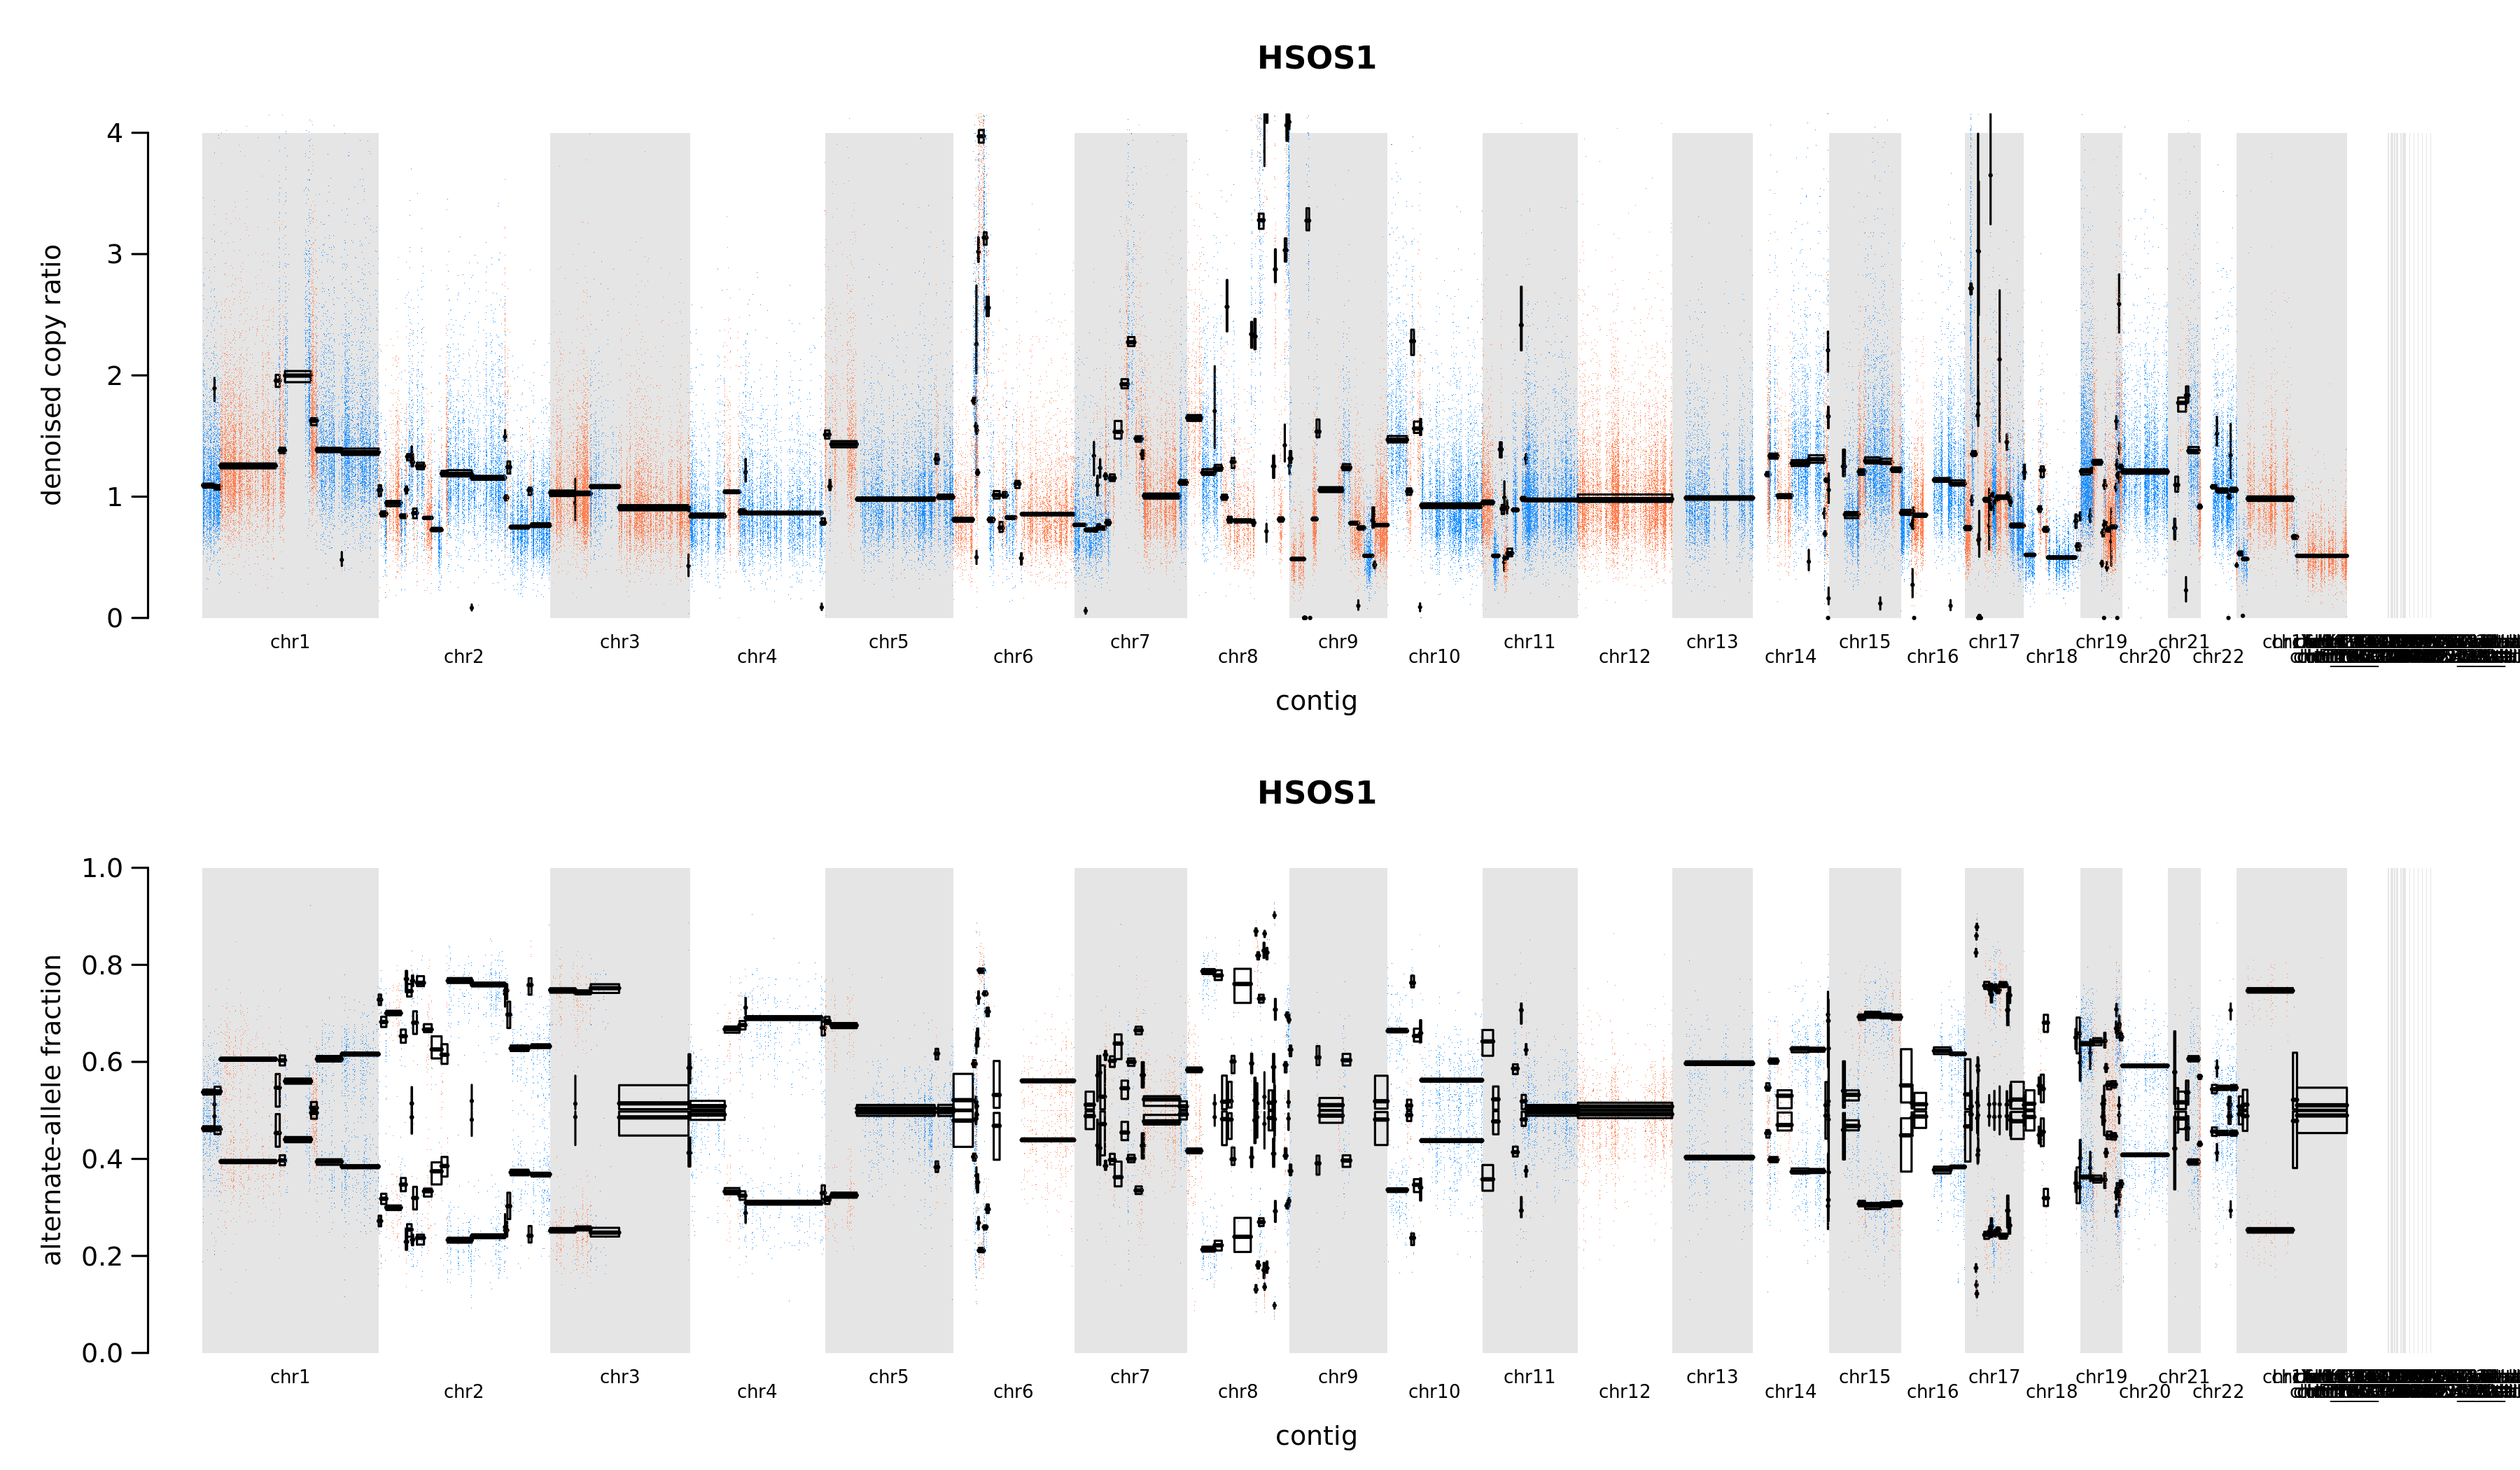

In [57]:
for plot in plots:
    display(Image('temp/'+plot.split('/')[-1]))

# Upload to taiga

In [5]:
tc.update_dataset(dataset_permaname="segmented-cn-wes-prioritzed-7fe1", 
                  upload_file_path_dict={'temp/wes.'+sample_set_id+'.gene.cn': 'NumericMatrixTSV',
                                        'temp/wes.'+sample_set_id+'.segmented.cn': 'TableCSV'},
                 dataset_description="updating to ",
                force_remove=True
                 )

Uploading wes.19Q3interim.gene...
hitting https://cds.team/taiga/api/datafile/60e31a4ba9eb47feae14782f1485bed9
Conversion and upload...:
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 750
	 Conversion in progress, line 750
	 Conversion in progress, line 750
	 Conversion in progress, line 1000
	 Conversion in progress, line 1000
	 Conversion in progress, line 1000
	 Conversion in progress, line 1000
	 Conversi

'08b499f2757143d8addd9c6c89be643e'